In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
y = iris.target
x = iris.data

In [5]:
x.shape

(150, 4)

In [6]:
import pandas as pd

pd.DataFrame(x)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
pca = PCA(n_components=2)
pca = pca.fit(x)
x_dr = pca.transform(x)

In [9]:
x_dr.shape

(150, 2)

In [11]:
# 可视化

x_dr[y == 0, 0].shape

(50,)

In [12]:
colors = ["red", "black", "orange"]
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

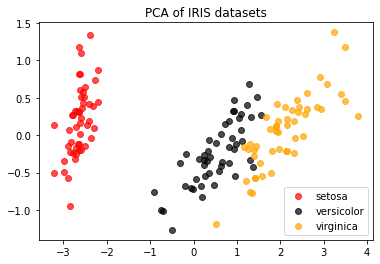

In [13]:
plt.figure()

for i in range(3):
    plt.scatter(x_dr[y == i, 0]
                ,x_dr[y == i, 1]
                ,alpha=0.7
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title("PCA of IRIS datasets")
plt.show()

In [15]:
# 探索降维后的数据

import numpy as np
pca_line = PCA().fit(x)

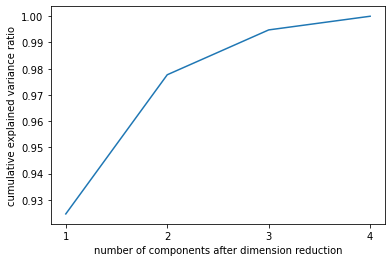

In [19]:
plt.plot([1, 2, 3, 4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [18]:
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [20]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(x)
x_mle = pca_mle.transform(x)

In [21]:
x_mle.shape

(150, 3)

In [22]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

In [23]:
pca_f = PCA(n_components=0.97, svd_solver="full")
pca_f = pca_f.fit(x)
x_f = pca_f.transform(x)

In [24]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [25]:
pca_f.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [26]:
x.shape

(150, 4)

In [33]:
# 当 x 为图像时，components_ 可以用于可视化，探索新特征空间从原始数据提取了什么重要信息

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [28]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [29]:
# 数据
faces.images.shape

(1348, 62, 47)

In [30]:
# 特征矩阵
faces.data.shape

(1348, 2914)

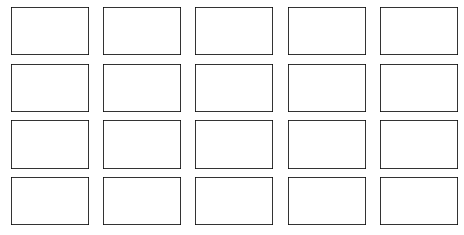

In [35]:
fig, axes = plt.subplots(4, 5
                         ,figsize=(8, 4)
                         ,subplot_kw={"xticks":[], "yticks":[]} # 不显示坐标轴
                        )

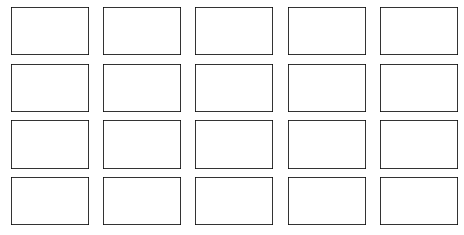

In [36]:
fig

In [37]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [38]:
axes.flat

In [39]:
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
              ,cmap="gray" # 色彩模式
             )

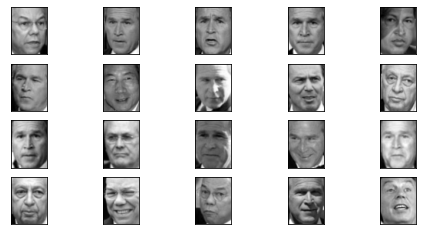

In [40]:
fig

In [41]:
X = faces.data
pca = PCA(n_components=150).fit(X)

In [42]:
pca.components_

array([[-0.00579717, -0.00595362, -0.00615767, ..., -0.01000115,
        -0.00901095, -0.0081392 ],
       [ 0.01708362,  0.0162369 ,  0.01622031, ..., -0.03474263,
        -0.03416985, -0.03298325],
       [-0.01833653, -0.01670153, -0.01557029, ..., -0.03540286,
        -0.03147694, -0.0292978 ],
       ...,
       [-0.03590526, -0.02028681, -0.00573824, ..., -0.03934029,
        -0.01715377,  0.01833753],
       [-0.02124597, -0.01252411, -0.00223681, ...,  0.05448937,
         0.04172659,  0.02162459],
       [ 0.04020345,  0.00970573, -0.02147272, ...,  0.00382938,
        -0.01055807, -0.01152537]], dtype=float32)

In [43]:
V = pca.components_
V.shape

(150, 2914)

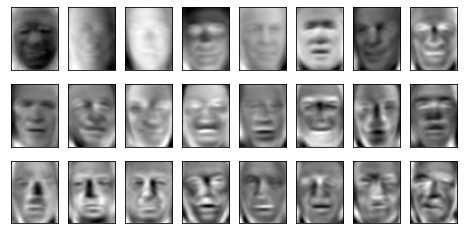

In [45]:
fig, axes = plt.subplots(3, 8
                         ,figsize=(8, 4)
                         ,subplot_kw={"xticks":[], "yticks":[]}
                        )

for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62, 47), cmap="gray")

In [49]:
X_dr = pca.transform(X)
X_dr.shape

(1348, 150)

In [47]:
X_inverse = pca.inverse_transform(X_dr)

In [48]:
X_inverse.shape

(1348, 2914)

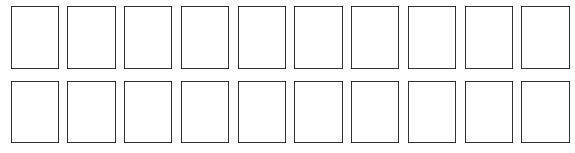

In [50]:
fig, ax = plt.subplots(2, 10
                       ,figsize=(10, 2.5)
                       ,subplot_kw={"xticks":[], "yticks":[]}
                      )

In [53]:
for i in range(10):
    ax[0, i].imshow(faces.images[i, :, :], cmap="binary_r")
    ax[1, i].imshow(X_inverse[i].reshape(62, 47), cmap="binary_r")

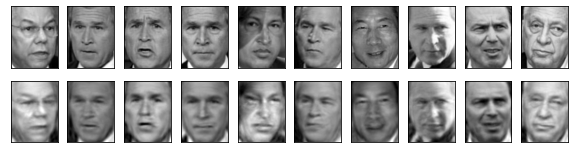

In [54]:
fig